In [1]:
# -*- coding: utf-8 -*-

In [2]:
import csv
import re
import json
import os
import threading
from pprint import pprint as pp
from functools import reduce
import itertools as it

In [3]:
from pythainlp.sentiment import sentiment
from pythainlp.romanization import romanization
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [4]:
user_tweet_files = os.listdir('./user-tweet')
print('# of user file = %d' % len(user_tweet_files))

# of user file = 4672


In [5]:
party_name = ['ประชาธิปัตย์', 'พลังประชารัฐ', 'รวมพลังประชาชาติไทย', 'เสรีรวมไทย', 'เพื่อไทย', 'อนาคตใหม่']
user_sentiment_list = []
sentiment_account_list = []

pro_party_account = {
    'ประชาธิปัตย์': set(), 
    'พลังประชารัฐ': set(), 
    'รวมพลังประชาชาติไทย': set(), 
    'เสรีรวมไทย': set(), 
    'เพื่อไทย': set(), 
    'อนาคตใหม่': set(),
}

In [15]:
def sentiment_thread(tweet_data, index, user):
    if index % 100 == 0:
        print('Now, the index is %d' % index)
        
    user_sentiment = {
        'ประชาธิปัตย์': {'pos': 0, 'neg': 0}, 
        'พลังประชารัฐ': {'pos': 0, 'neg': 0}, 
        'รวมพลังประชาชาติไทย': {'pos': 0, 'neg': 0}, 
        'เสรีรวมไทย': {'pos': 0, 'neg': 0}, 
        'เพื่อไทย': {'pos': 0, 'neg': 0}, 
        'อนาคตใหม่':{'pos': 0, 'neg': 0},
    }
    
    for datum in tweet_data:
        tweet = datum['text']
        
        if not any([party in tweet for party in party_name]):
            continue
        
        result = sentiment(tweet)
        for party in party_name:
            if party in tweet:
                user_sentiment[party][result] += 1
                

    user_sentiment_list.append(user_sentiment)
    sentiment_account_list.append(user)
    
pp(sorted(sentiment_account_list))
    

['04EokOoOzEOsLP7',
 '061117PP',
 '06ht2Y1gZJSqjvt',
 '0825ne23',
 '08_dao',
 '08laongdao',
 '0928696931_',
 '0DBJZKub4ipSlRD',
 '0g2JajJAj8DIF0v',
 '0il_Oh',
 '0nr4wHv7s3TkEL9',
 '0obqUTY18R6BqRm',
 '0pco57vVVIyHzyN',
 '0v1qCmPNuCsUFkW',
 '101SeretGarden',
 '101forst',
 '102IceLy',
 '103Noy',
 '11vasco___',
 '120Sec2',
 '1303crochets',
 '13357kts',
 '13dec1994',
 '14Zeroonbb',
 '14decq_',
 '1809_Mh',
 '191_ink',
 '199xmch',
 '19byunlie92',
 '19x_ms',
 '1A6zRpBHgdjwBeX',
 '1Viiiiiii',
 '1iZLC8ezUNjXj85',
 '1uIHwK1CwCuwh6y',
 '1vK0vNIQyLfekns',
 '2020tong',
 '20DLB',
 '21xpchy',
 '2291Love',
 '22Delivery',
 '23121961',
 '23_delivery',
 '2401Milky',
 '2528Nick',
 '25_delivery',
 '26Delivery',
 '27Delivery',
 '2808DEGREE',
 '290745_',
 '296663082966630',
 '29Delivery',
 '2B_c2act',
 '2D3D4DHD',
 '2JwgEZc0DMCGeWe',
 '2N_93qz',
 '2ZKuy86wEysmAXF',
 '2fai',
 '2minoco',
 '2morrowkhun',
 '2qkiz',
 '2rdNdouble10',
 '31102551',
 '354029646a0c4ae',
 '365pwq',
 '382seven',
 '3As9NpsTTmuFB8j',
 '3E

 'peepenter',
 'peepicka',
 'peeterppz',
 'pemi825',
 'pemieiei',
 'peoplefighter1',
 'pepepepppppppp',
 'pepo10076639',
 'pesterman',
 'peterz014',
 'petitenune',
 'peurim1126',
 'pg_bmmm',
 'phage0134',
 'phanasGook',
 'phanon13',
 'phapfan',
 'phattaraphon_c',
 'phattarawut7',
 'pheraphat_n',
 'phichai',
 'philippa_smile',
 'philogotjifc',
 'phinpetch',
 'phinyasinee',
 'phone_drk',
 'phoolketkif',
 'phoom91',
 'phornsuda18',
 'phornsuda2538',
 'phufa2012',
 'phumint',
 'phuun_',
 'phuwasisfocus',
 'piangdin',
 'pickaboo0259',
 'pickkez',
 'pidjumroon',
 'piggy95085666',
 'pigkapikapu',
 'pigpig2ping',
 'pijikaqueen',
 'pijjajoast',
 'pimchmp',
 'pimeraeyo',
 'pinksmokeishere',
 'pinsuda_beam',
 'pinyada1122',
 'pinyapatpd',
 'pipapry',
 'pipob69',
 'pippreaw99',
 'pitApat_MHB',
 'pittaya',
 'piyanoic_kjb',
 'pizad_sura',
 'pjIeO1rjganANu2',
 'pjytaj',
 'pk_district',
 'pkranger5',
 'pktk2543',
 'pla_pumpui39',
 'plagapong',
 'plaifah5699',
 'plaiiiiiz',
 'plaimanee',
 'play4509',
 

In [16]:
thd_list = []

for index in range(0, len(user_tweet_files)):    
    file = user_tweet_files[index]
    path_to_file = './user-tweet/%s' % file
    user = file.split('.')[0]
    
    with open(path_to_file, 'r', encoding='utf8') as fp:
        data = json.load(fp)
    fp.close()    
    
    thd = threading.Thread(target=sentiment_thread, args=(data,index,user))
    thd_list.append(thd)

for thd in thd_list:
    thd.start()
    thd.join()
    
print(len(user_sentiment_list))

Now, the index is 0
Now, the index is 100
Now, the index is 200
Now, the index is 300
Now, the index is 400
Now, the index is 500
Now, the index is 600
Now, the index is 700
Now, the index is 800
Now, the index is 900
Now, the index is 1000
Now, the index is 1100
Now, the index is 1200
Now, the index is 1300
Now, the index is 1400
Now, the index is 1500
Now, the index is 1600
Now, the index is 1700
Now, the index is 1800
Now, the index is 1900
Now, the index is 2000
Now, the index is 2100
Now, the index is 2200
Now, the index is 2300
Now, the index is 2400
Now, the index is 2500
Now, the index is 2600
Now, the index is 2700
Now, the index is 2800
Now, the index is 2900
Now, the index is 3000
Now, the index is 3100
Now, the index is 3200
Now, the index is 3300
Now, the index is 3400
Now, the index is 3500
Now, the index is 3600
Now, the index is 3700
Now, the index is 3800
Now, the index is 3900
Now, the index is 4000
Now, the index is 4100
Now, the index is 4200
Now, the index is 4300


In [17]:
no_zero_sentiment = list(
    filter(
        lambda x: any([x[key]['pos'] != 0 or x[key]['neg'] != 0 for key in party_name]), 
        user_sentiment_list
    )
)

In [18]:
pro_party = {
    'ประชาธิปัตย์': [], 
    'พลังประชารัฐ': [], 
    'รวมพลังประชาชาติไทย': [], 
    'เสรีรวมไทย': [], 
    'เพื่อไทย': [], 
    'อนาคตใหม่': [],
}

for i in range(len(no_zero_sentiment)):
    max_pos_list = [x['pos'] for x in no_zero_sentiment[i].values()]
    max_index = max_pos_list.index(max(max_pos_list)) if sum(max_pos_list) > 1 else None
    if max_index != None:
        max_pos_party = list(pro_party.keys())[max_index]
        pro_party[max_pos_party].append(no_zero_sentiment[i])
        
        account_index = user_sentiment_list.index(no_zero_sentiment[i])
        pro_party_account[max_pos_party].add(sentiment_account_list[account_index])

In [19]:
for key in pro_party_account:
    if '__fhso' in pro_party_account[key]:
        print(key)

อนาคตใหม่


In [20]:
def sum_neg_pos(x, y):
    return {
        'neg': x['neg'] + y['neg'],
        'pos': x['pos'] + y['pos']
    }

def sum_sentiment_dict(x, y):
    return {
        'ประชาธิปัตย์': sum_neg_pos(x['ประชาธิปัตย์'], y['ประชาธิปัตย์']),
        'พลังประชารัฐ': sum_neg_pos(x['พลังประชารัฐ'], y['พลังประชารัฐ']),
        'รวมพลังประชาชาติไทย': sum_neg_pos(x['รวมพลังประชาชาติไทย'], y['รวมพลังประชาชาติไทย']),
        'อนาคตใหม่': sum_neg_pos(x['อนาคตใหม่'], y['อนาคตใหม่']),
        'เพื่อไทย': sum_neg_pos(x['เพื่อไทย'], y['เพื่อไทย']),
        'เสรีรวมไทย': sum_neg_pos(x['เสรีรวมไทย'], y['เสรีรวมไทย'])
    }

sum_sentiment = {}
for party in pro_party:
    sum_sentiment['pro-'+party] = dict(reduce(sum_sentiment_dict, pro_party[party]))

['ประชาธิปัตย์', 'พลังประชารัฐ', 'รวมพลังประชาชาติไทย', 'อนาคตใหม่', 'เพื่อไทย', 'เสรีรวมไทย'] [88.16705336426914, 98.55072463768117, 100.0, 84.71337579617835, 92.85714285714286, 85.18518518518519]
['ประชาธิปัตย์', 'พลังประชารัฐ', 'รวมพลังประชาชาติไทย', 'อนาคตใหม่', 'เพื่อไทย', 'เสรีรวมไทย'] [11.832946635730858, 1.4492753623188406, 0.0, 15.286624203821656, 7.142857142857142, 14.814814814814813]


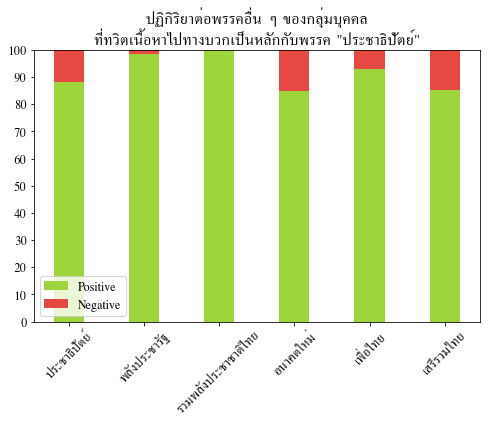

['ประชาธิปัตย์', 'พลังประชารัฐ', 'รวมพลังประชาชาติไทย', 'อนาคตใหม่', 'เพื่อไทย', 'เสรีรวมไทย'] [71.71052631578947, 93.45661450924608, 90.9090909090909, 70.55961070559611, 86.61417322834646, 90.9090909090909]
['ประชาธิปัตย์', 'พลังประชารัฐ', 'รวมพลังประชาชาติไทย', 'อนาคตใหม่', 'เพื่อไทย', 'เสรีรวมไทย'] [28.289473684210524, 6.543385490753911, 9.090909090909092, 29.44038929440389, 13.385826771653544, 9.090909090909092]


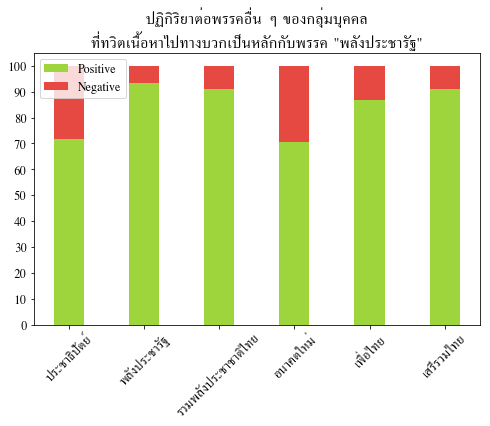

['ประชาธิปัตย์', 'พลังประชารัฐ', 'รวมพลังประชาชาติไทย', 'อนาคตใหม่', 'เพื่อไทย', 'เสรีรวมไทย'] [0.0, 100.0, 76.47058823529412, 90.0, 66.66666666666666, 100.0]
['ประชาธิปัตย์', 'พลังประชารัฐ', 'รวมพลังประชาชาติไทย', 'อนาคตใหม่', 'เพื่อไทย', 'เสรีรวมไทย'] [100.0, 0.0, 23.52941176470588, 10.0, 33.33333333333333, 0.0]


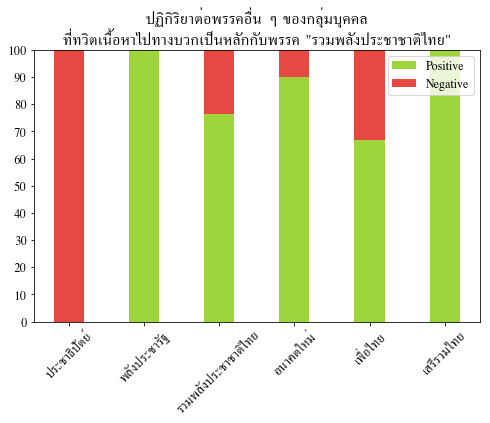

['ประชาธิปัตย์', 'พลังประชารัฐ', 'รวมพลังประชาชาติไทย', 'อนาคตใหม่', 'เพื่อไทย', 'เสรีรวมไทย'] [89.47368421052632, 100.0, 100.0, 83.83838383838383, 94.20289855072464, 96.7065868263473]
['ประชาธิปัตย์', 'พลังประชารัฐ', 'รวมพลังประชาชาติไทย', 'อนาคตใหม่', 'เพื่อไทย', 'เสรีรวมไทย'] [10.526315789473683, 0.0, 0.0, 16.161616161616163, 5.797101449275362, 3.293413173652695]


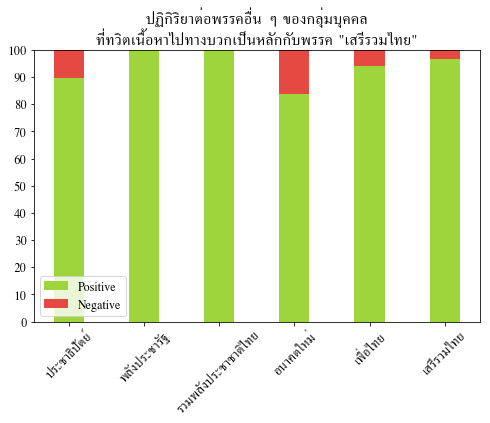

['ประชาธิปัตย์', 'พลังประชารัฐ', 'รวมพลังประชาชาติไทย', 'อนาคตใหม่', 'เพื่อไทย', 'เสรีรวมไทย'] [82.5, 87.5, 100.0, 78.96825396825396, 89.94413407821229, 88.0]
['ประชาธิปัตย์', 'พลังประชารัฐ', 'รวมพลังประชาชาติไทย', 'อนาคตใหม่', 'เพื่อไทย', 'เสรีรวมไทย'] [17.5, 12.5, 0.0, 21.03174603174603, 10.05586592178771, 12.0]


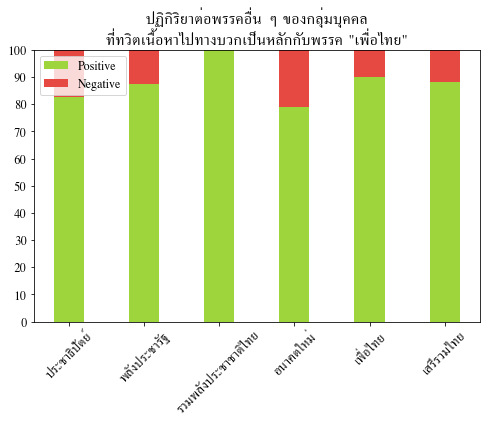

['ประชาธิปัตย์', 'พลังประชารัฐ', 'รวมพลังประชาชาติไทย', 'อนาคตใหม่', 'เพื่อไทย', 'เสรีรวมไทย'] [85.33834586466166, 89.66346153846155, 96.49122807017544, 81.86058344640435, 86.25954198473282, 96.80511182108627]
['ประชาธิปัตย์', 'พลังประชารัฐ', 'รวมพลังประชาชาติไทย', 'อนาคตใหม่', 'เพื่อไทย', 'เสรีรวมไทย'] [14.661654135338345, 10.336538461538462, 3.508771929824561, 18.13941655359566, 13.740458015267176, 3.1948881789137378]


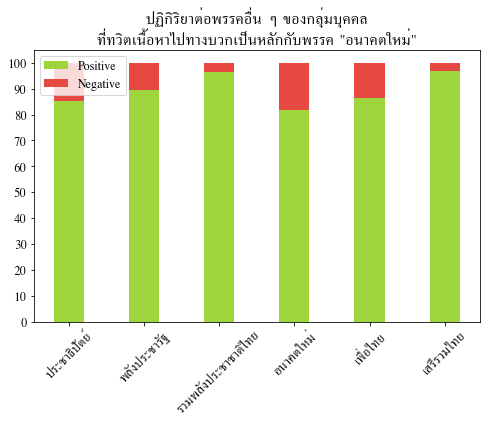

In [21]:
def plot_sentiment(party):
    party_sum_sentiment = sum_sentiment['pro-%s' % party]
    df = pd.DataFrame(party_sum_sentiment).transpose()

    matplotlib.rc('font', family='Kinnari', size=12)

    percent = lambda x,y: x/sum(y)*100

    neg_arr = [i[0] / sum(i) * 100 for i in df.values]
    pos_arr = [i[1] / sum(i) * 100 for i in df.values]

    encoded_name = [i for i in party_sum_sentiment.keys()]

    idx = range(len(encoded_name))
    
    plt.figure(figsize=(8, 5))
    
    print(encoded_name, pos_arr)
    print(encoded_name, neg_arr)
    
    plt1 = plt.bar(encoded_name, pos_arr, align='center', color='#9ED53C', width=0.4)
    plt2 = plt.bar(encoded_name, neg_arr, align='center', bottom=pos_arr, color='#E54941', width=0.4)
    
    plt.xticks(rotation=45)
    plt.yticks(range(0, 101, 10))
    plt.title('ปฏิกิริยาต่อพรรคอื่น ๆ ของกลุ่มบุคคล\nที่ทวิตเนื้อหาไปทางบวกเป็นหลักกับพรรค "%s"' % party)
    plt.legend((plt1, plt2), ('Positive', 'Negative'))
    
    plt.savefig(party + '.jpg')
    plt.show()

for party in party_name:
    plot_sentiment(party)

ประชาธิปัตย์ 58
พลังประชารัฐ 86
รวมพลังประชาชาติไทย 7
เสรีรวมไทย 35
เพื่อไทย 69
อนาคตใหม่ 319


([<matplotlib.axis.XTick at 0x7f935e8d0748>,
 <a list of 6 Text xticklabel objects>)

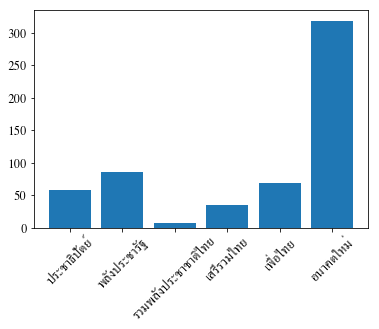

In [22]:
sum_pro_acc = []
idx = []

for key in pro_party_account:
    idx.append(key)
    sum_pro_acc.append(len(pro_party_account[key]))
    print(key, len(pro_party_account[key]))
    
plt.bar(range(len(idx)), sum_pro_acc)
plt.xticks(range(len(idx)), idx, rotation=45)

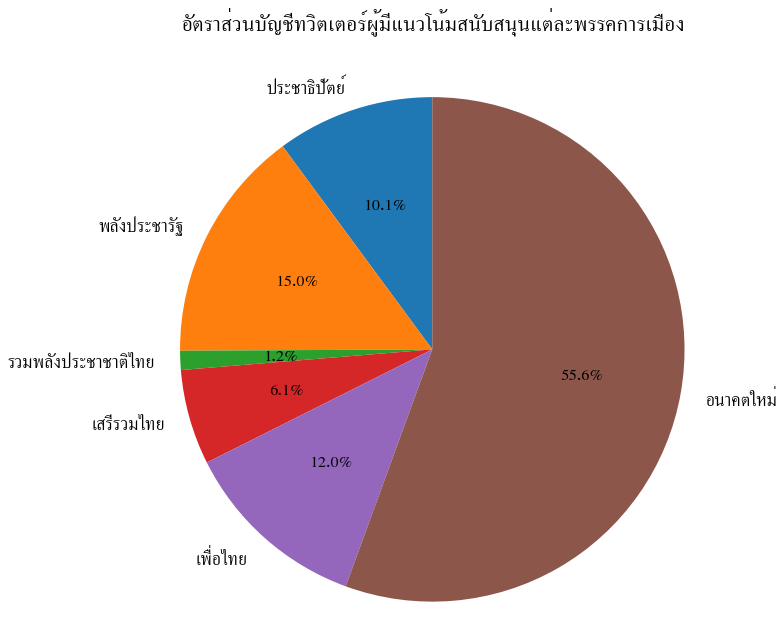

In [23]:
matplotlib.rc('font', family='Kinnari', size=16)
fig1, ax1 = plt.subplots(figsize=(10,10))
ax1.set_title('อัตราส่วนบัญชีทวิตเตอร์ผู้มีแนวโน้มสนับสนุนแต่ละพรรคการเมือง', y=1.08)

ax1.pie(sum_pro_acc, labels=idx, autopct='%1.1f%%', startangle=90)
ax1.axis('equal')

plt.savefig('pie.jpg')
plt.show()